In [1]:
import rasterio
from rasterio.plot import show
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, "..")
from eis_toolkit.prediction.mlp import train_MLP_regressor, train_MLP_classifier
from eis_toolkit.prediction.machine_learning_general import prepare_data_for_ml, predict, reshape_predictions

2024-01-11 14:13:01.950180: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-11 14:13:01.979934: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-11 14:13:02.103308: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 14:13:02.103380: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 14:13:02.103942: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
# Training filepaths
AEM_inphase_fp = "../tests/data/local/workflow_demo/clipped/AEM_inph_clipped.tif"
AEM_quad_fp = "../tests/data/local/workflow_demo/clipped/AEM_quad_clipped.tif"
EM_ratio_fp = "../tests/data/local/workflow_demo/clipped/EM_ratio_clipped.tif"
magnetic_fp = "../tests/data/local/workflow_demo/clipped/magnetic_clipped.tif"
distances_fp = "../tests/data/local/workflow_demo/clipped/distances_clipped.tif"

training_data_filepaths = [AEM_inphase_fp, AEM_quad_fp, EM_ratio_fp, magnetic_fp, distances_fp]

input_rasters = {
    "AEM_inphase": AEM_inphase_fp,
    "AEM_quad": AEM_quad_fp,
    "EM_ratio": EM_ratio_fp,
    "magnetic": magnetic_fp,
    "distances_to_structures": distances_fp,
}

deposits_fp = "../tests/data/local/workflow_demo/clipped/deposits_clipped.gpkg"
deposits_rasterized_fp = "../tests/data/local/workflow_demo/clipped/deposits_rasterized.tif"

In [3]:
# Test filepaths
test_data_filepaths = [
    "../tests/data/local/workflow_demo/unified/AEM_Inph.tif",
    "../tests/data/local/workflow_demo/unified/AEM_Quad.tif",
    "../tests/data/local/workflow_demo/unified/EM_ratio.tif",
    "../tests/data/local/workflow_demo/unified/IOCG_Magnetic.tif",
    "../tests/data/local/workflow_demo/distances_raster.tif"
]

deposits_fp_test = "../tests/data/local/workflow_demo/Deposits_Occurrences/IOCG_Deps_Prosp_Occs_2.shp"

In [4]:
# Parameters for the notebook
colormap_name = "jet"
save = True
random_state = 42

In [5]:
# Prepare data for modeling
X_train, y_train, _, _ = prepare_data_for_ml(training_data_filepaths, deposits_rasterized_fp)

X_test, y_test, reference_meta, nodata_mask = prepare_data_for_ml(test_data_filepaths, deposits_fp_test)

In [17]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)


TODO:

- Inputs automatically normalized (or with a parameter?) in CLI?
- Identify whether binary classification or multi-class classification and decide if inputs should be one-hot encoded


Currently, MLP does not predict anything

In [18]:
# Train MLP classifier model
mlp_cls_model, mlp_cls_history = train_MLP_classifier(
    X=X_train,
    y=y_train,
    neurons=[16],
    random_state=random_state
)
mlp_cls_history

Epoch 1/50
10229/10229 [==============================] - 26s 3ms/step - loss: 0.0132 - accuracy: 0.9977 - val_loss: 2.0965e-04 - val_accuracy: 1.0000
Epoch 2/50
10229/10229 [==============================] - 26s 3ms/step - loss: 5.1274e-04 - accuracy: 1.0000 - val_loss: 1.4212e-04 - val_accuracy: 1.0000
Epoch 3/50
10229/10229 [==============================] - 26s 2ms/step - loss: 4.8500e-04 - accuracy: 1.0000 - val_loss: 1.0621e-04 - val_accuracy: 1.0000
Epoch 4/50
10229/10229 [==============================] - 24s 2ms/step - loss: 4.0834e-04 - accuracy: 1.0000 - val_loss: 8.8554e-05 - val_accuracy: 1.0000
Epoch 5/50
10229/10229 [==============================] - 25s 2ms/step - loss: 4.0683e-04 - accuracy: 1.0000 - val_loss: 1.0875e-04 - val_accuracy: 1.0000
Epoch 6/50
10229/10229 [==============================] - 27s 3ms/step - loss: 4.3300e-04 - accuracy: 1.0000 - val_loss: 1.0156e-04 - val_accuracy: 1.0000
Epoch 7/50
10229/10229 [==============================] - 29s 3ms/step - l

{'loss': [0.013234359212219715,
  0.0005127353360876441,
  0.00048499536933377385,
  0.0004083410603925586,
  0.0004068341513630003,
  0.00043300222023390234,
  0.0004096327174920589,
  0.0004315050318837166,
  0.00041987106669694185],
 'accuracy': [0.9977360963821411,
  0.9999603033065796,
  0.9999603033065796,
  0.9999603033065796,
  0.9999603033065796,
  0.9999603033065796,
  0.9999572038650513,
  0.9999603033065796,
  0.9999541640281677],
 'val_loss': [0.00020964987925253808,
  0.00014212072710506618,
  0.00010620648390613496,
  8.855373744154349e-05,
  0.00010875245061470196,
  0.00010156049393117428,
  0.00010139382357010618,
  0.00011408567661419511,
  0.00012820021947845817],
 'val_accuracy': [0.999987781047821,
  0.999987781047821,
  0.999987781047821,
  0.999987781047821,
  0.999987781047821,
  0.999987781047821,
  0.999987781047821,
  0.999987781047821,
  0.999987781047821]}

In [22]:
# Predict using the same data as was used for training (for "validation" map)
mlp_cls_predictions = predict(X_test, mlp_cls_model)

mlp_cls_predictions_transposed = mlp_cls_predictions.transpose()[0]
# Reshape into 2D format and fill with nodata
mlp_cls_predictions_reshaped = reshape_predictions(mlp_cls_predictions_transposed, reference_meta["height"], reference_meta["width"], nodata_mask)

57578/57578 [==============================] - 50s 861us/step


In [30]:
print(mlp_cls_predictions.max())

0.33336008


In [24]:
mlp_cls_predictions_transposed.shape

(1842496,)

<Axes: title={'center': 'MLP classifier predictons'}>

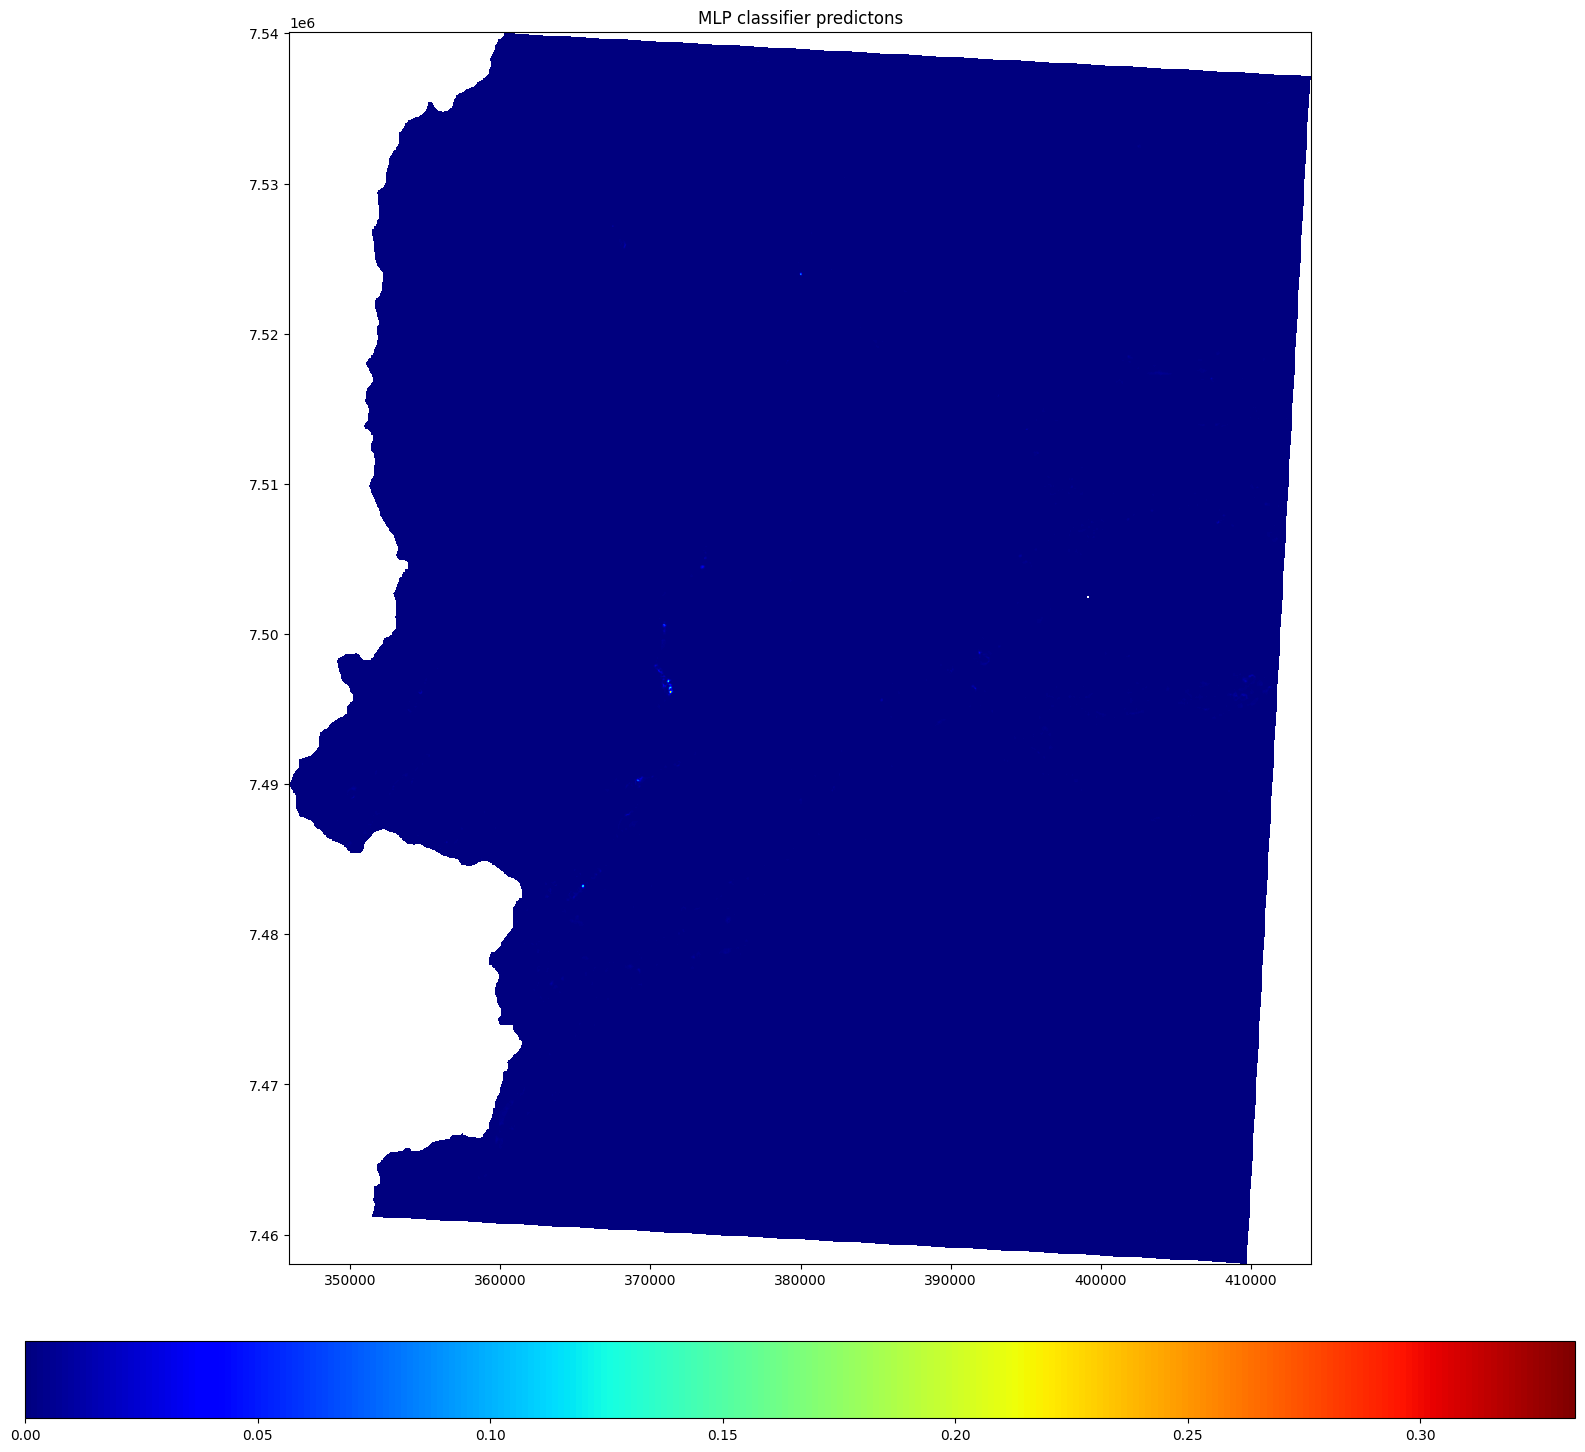

In [29]:
# Visualize output
fig, ax = plt.subplots(figsize = (20, 20))

ax.set_title("MLP classifier predictons")
clrbar = ax.imshow(mlp_cls_predictions_reshaped, cmap=colormap_name)
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(mlp_cls_predictions_reshaped, ax = ax, transform = reference_meta["transform"], cmap=colormap_name)

In [31]:
# Train MLP regressor model
mlp_regr_model, mlp_regr_history = train_MLP_regressor(
    X=X_train,
    y=y_train,
    neurons=[16],
    random_state=random_state
)
mlp_regr_history

Epoch 1/50
10229/10229 [==============================] - 14s 1ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 1.6821e-05 - val_mse: 1.6821e-05
Epoch 2/50
10229/10229 [==============================] - 16s 2ms/step - loss: 5.9687e-05 - mse: 5.9687e-05 - val_loss: 1.2556e-05 - val_mse: 1.2556e-05
Epoch 3/50
10229/10229 [==============================] - 20s 2ms/step - loss: 5.2633e-05 - mse: 5.2633e-05 - val_loss: 1.2367e-05 - val_mse: 1.2367e-05
Epoch 4/50
10229/10229 [==============================] - 15s 1ms/step - loss: 5.0096e-05 - mse: 5.0096e-05 - val_loss: 1.5076e-05 - val_mse: 1.5076e-05
Epoch 5/50
10229/10229 [==============================] - 14s 1ms/step - loss: 4.8850e-05 - mse: 4.8850e-05 - val_loss: 1.4752e-05 - val_mse: 1.4752e-05
Epoch 6/50
10229/10229 [==============================] - 15s 1ms/step - loss: 4.7285e-05 - mse: 4.7285e-05 - val_loss: 1.2342e-05 - val_mse: 1.2342e-05
Epoch 7/50
10229/10229 [==============================] - 15s 1ms/step - loss: 4.5816e-05 

{'loss': [0.0016897980822250247,
  5.9686928580049425e-05,
  5.263253842713311e-05,
  5.009594315197319e-05,
  4.88496407342609e-05,
  4.728468047687784e-05,
  4.5816152123734355e-05,
  4.7059296775842085e-05,
  4.4605156290344894e-05,
  4.480247662286274e-05,
  4.513803287409246e-05],
 'mse': [0.0016897980822250247,
  5.9686928580049425e-05,
  5.263253842713311e-05,
  5.009594315197319e-05,
  4.88496407342609e-05,
  4.728468047687784e-05,
  4.5816152123734355e-05,
  4.7059296775842085e-05,
  4.4605156290344894e-05,
  4.480247662286274e-05,
  4.513803287409246e-05],
 'val_loss': [1.6821129975141957e-05,
  1.2556028195831459e-05,
  1.2366747796477284e-05,
  1.5076183444762137e-05,
  1.475191857025493e-05,
  1.2342334230197594e-05,
  1.4268785889726132e-05,
  1.255105780728627e-05,
  1.3424022654362489e-05,
  1.2722277460852638e-05,
  1.256002451555105e-05],
 'val_mse': [1.6821129975141957e-05,
  1.2556028195831459e-05,
  1.2366747796477284e-05,
  1.5076183444762137e-05,
  1.475191857025

In [32]:
# Predict using the same data as was used for training (for "validation" map)
mlp_regr_predictions = predict(X_test, mlp_regr_model)

mlp_regr_predictions_transposed = mlp_regr_predictions.transpose()[0]
# Reshape into 2D format and fill with nodata
mlp_regr_predictions_reshaped = reshape_predictions(mlp_regr_predictions_transposed, reference_meta["height"], reference_meta["width"], nodata_mask)

57578/57578 [==============================] - 51s 892us/step


<Axes: title={'center': 'MLP regressor predictons'}>

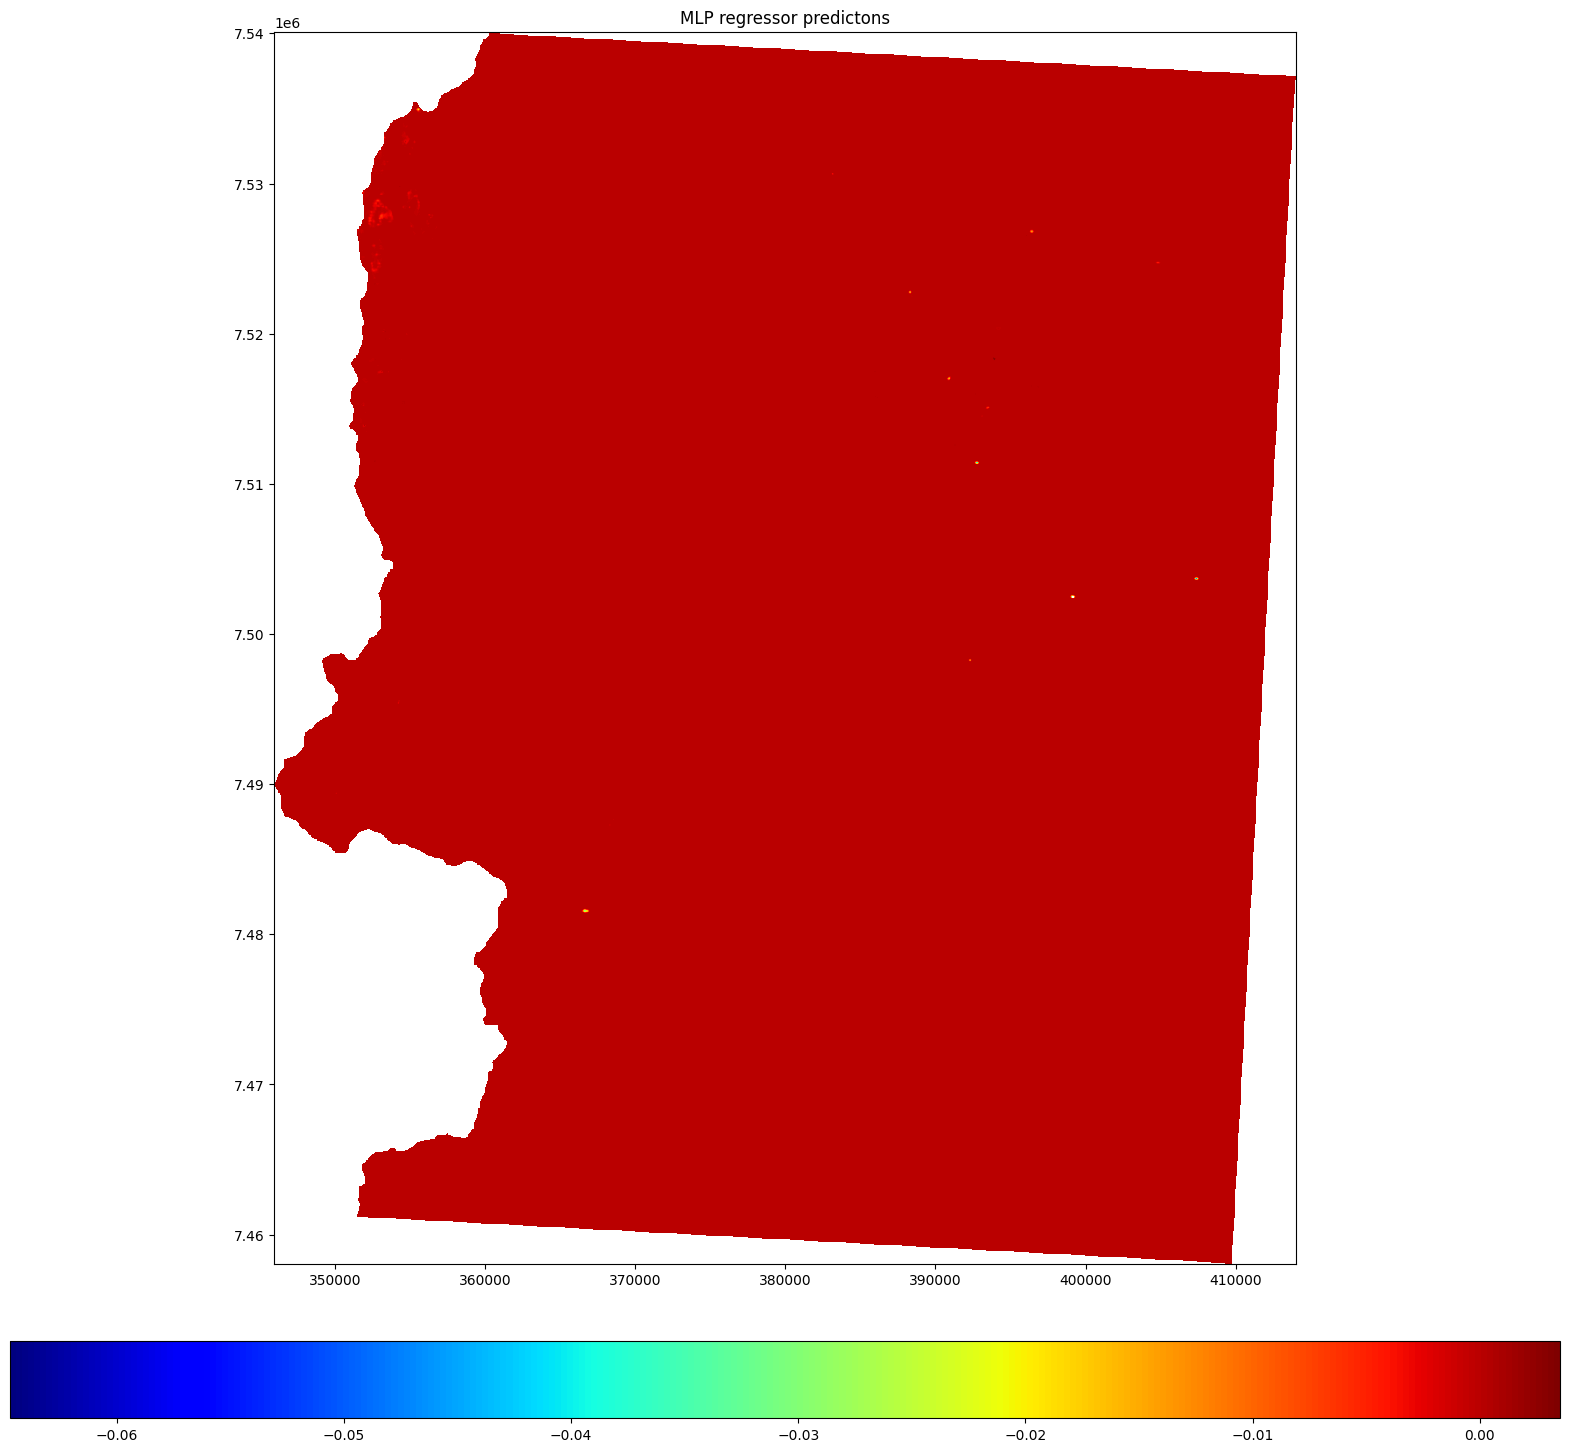

In [33]:
# Visualize output
fig, ax = plt.subplots(figsize = (20, 20))

ax.set_title("MLP regressor predictons")
clrbar = ax.imshow(mlp_regr_predictions_reshaped, cmap=colormap_name)
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(mlp_regr_predictions_reshaped, ax = ax, transform = reference_meta["transform"], cmap=colormap_name)